In [2]:
# AIM OF THE PROJECT

## 1. The main aim of the project is to predict the median value of owner occupied homes
## This is done by using a simple artificial neural networks.

In [3]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load the data

# give the column names of the dataset
BHNames= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']

# url link of the dataset
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delim_whitespace = True, names = BHNames)

In [5]:
# get the data
print(data)

        crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [6]:
'''
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s'''

'\nCRIM: Per capita crime rate by town\nZN: Proportion of residential land zoned for lots over 25,000 sq. ft\nINDUS: Proportion of non-retail business acres per town\nCHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX: Nitric oxide concentration (parts per 10 million)\nRM: Average number of rooms per dwelling\nAGE: Proportion of owner-occupied units built prior to 1940\nDIS: Weighted distances to five Boston employment centers\nRAD: Index of accessibility to radial highways\nTAX: Full-value property tax rate per $10,000\nPTRATIO: Pupil-teacher ratio by town\nB: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town\nLSTAT: Percentage of lower status of the population\nMEDV: Median value of owner-occupied homes in $1000s'

In [7]:
# Display the first five rows of the dataset
print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [8]:
# Display the last five rows of the dataset
print(data.tail())

        crim   zn  indus  chas    nox     rm   age     dis  rad    tax  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     ptratio   black  lstat  medv  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  


In [9]:
# Shape of the dataset
print(data.shape)

(506, 14)


In [12]:
# To check if there are any NULL Values in the dataset
print(data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [13]:
# So from the above observation, it is clear that there are no NULL Values in the dataset

In [14]:
# STATISTICAL SUMMARY OF THE HOUSE  DATA
print(data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [15]:
# DESCRIPTIVE SUMMARY OF THE HOUSING DATA
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [17]:
# DATA PREPROCESSING

In [20]:
# To scale all the input features in one range (in the range of 0 to 1)

from sklearn.preprocessing import MinMaxScaler

# call the object for MinMaxScaler
minmax = MinMaxScaler()


# Transform the data in the range of 0 to 1
data_new = minmax.fit_transform(data)
#print(data_new)

# To convert the transformed data into the dataframe
df = pd.DataFrame(data_new, columns=  BHNames)
print(df)

         crim    zn     indus  chas       nox        rm       age       dis  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266  0.125072   

          rad       tax   ptratio     black     lst

In [22]:
# Get the Summary Statistics of the scaled data
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.040544    0.113636    0.391378    0.069170    0.349167    0.521869   
std      0.096679    0.233225    0.251479    0.253994    0.238431    0.134627   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000851    0.000000    0.173387    0.000000    0.131687    0.445392   
50%      0.002812    0.000000    0.338343    0.000000    0.314815    0.507281   
75%      0.041258    0.125000    0.646628    0.000000    0.491770    0.586798   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.676364    0.242381    0.371713    0.422208    0.622929    0.898568   
std      0.289896    0.1914

In [23]:
# Get the descriptive information about the scaled data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [24]:
# Get the transpose of the scaled data
print(df.transpose())

              0         1         2         3         4         5         6    \
crim     0.000000  0.000236  0.000236  0.000293  0.000705  0.000264  0.000921   
zn       0.180000  0.000000  0.000000  0.000000  0.000000  0.000000  0.125000   
indus    0.067815  0.242302  0.242302  0.063050  0.063050  0.063050  0.271628   
chas     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
nox      0.314815  0.172840  0.172840  0.150206  0.150206  0.150206  0.286008   
rm       0.577505  0.547998  0.694386  0.658555  0.687105  0.549722  0.469630   
age      0.641607  0.782698  0.599382  0.441813  0.528321  0.574665  0.656025   
dis      0.269203  0.348962  0.348962  0.448545  0.448545  0.448545  0.402923   
rad      0.000000  0.043478  0.043478  0.086957  0.086957  0.086957  0.173913   
tax      0.208015  0.104962  0.104962  0.066794  0.066794  0.066794  0.236641   
ptratio  0.287234  0.553191  0.553191  0.648936  0.648936  0.648936  0.276596   
black    1.000000  1.000000 

In [26]:
# Divide the dataset into independent and dependent variables
X = df.drop(columns = 'medv')
print(X)


Y = df['medv']
print(Y)

         crim    zn     indus  chas       nox        rm       age       dis  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266  0.125072   

          rad       tax   ptratio     black     lst

In [27]:
# Divide the independent and dependent variables into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 5)

In [29]:
# Shape of the training and testing data
print('X train shape = ', X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ', Y_test.shape)

X train shape =  (354, 13)
X test shape =  (152, 13)
Y train shape =  (354,)
Y test shape =  (152,)


In [30]:
# CONSTRUCT AN ARTIFICIAL NEURAL NETWORKS MODEL

# import the library for ANN Model
import keras
from keras.models import Sequential
from keras.layers import Dense


# call the object for ANN Model
annmodel = Sequential()

# create the first input and hidden layer
annmodel.add(Dense(20,input_dim = 13, activation = 'relu'))


# create the second hidden layer
annmodel.add(Dense(10, activation = 'relu'))

#create the output layer
annmodel.add(Dense(1, activation = 'linear'))

In [31]:
# COMPILE THE ANN Model
annmodel.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [32]:
# TRAIN THE ANN MODEL
annmodel.fit(X_train, Y_train, epochs = 1000, verbose = 1)

Epoch 1/1000
12/12 [==============================] - 1s 3ms/step - loss: 0.4745 - accuracy: 0.0056
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.0056
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.0056
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.0056
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.0028
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.0028
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.0056
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.0056
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.0056
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.0056

In [34]:
# GET THE BEST TRAINING ACCURACY MODEL
_, results = annmodel.evaluate(X_train, Y_train)
print(results)

12/12 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0282
0.028248587623238564


In [35]:
# Get the summary of the ANN Model
print(annmodel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
# PREDICT THE OUTPUT FOR THE TEST DATA
y_pred_test = annmodel.predict(X_test)
print(y_pred_test.shape)

5/5 [==============================] - 0s 2ms/step
(152, 1)


In [47]:
print( Y_test.shape)

(152,)


In [56]:
# Predict the mean squared error for the ANN Model
score = annmodel.evaluate(X_test, Y_test, verbose = 0)
print(score[0])

0.004825772251933813


In [57]:
# From the above observation, the mean square error value obtained through ANN after evaluating the testing data is 0.0048 which is very close to 100. So it is clear that there is less error difference between the training and testing adata

In [58]:
# LINEAR REGRESSION

[ 0.71977726  0.59039871  0.49186086  0.03447058  0.63762463  0.0122043
  0.49111236  0.55177355  0.47658276  0.38641634  0.60549778  0.3721983
  0.40941546  0.63510547  0.51810009  0.23033379 -0.1073305   0.30463451
  0.21343632  0.12894751 -0.04032158  0.319833    0.740719    0.43121249
  0.59998892  0.14115577  0.44273109  0.40871443  0.39446053  0.35768554
  0.2471768   0.0563433   0.27995508  0.39604599  0.53928678  0.30678555
  0.5185933   0.08010398  0.81405056  0.64883368  0.3359484  -0.0153362
  0.54691236  0.15381076  0.49382564  0.57656399 -0.25032635  0.33252591
  0.36875197  0.19207992  0.34441165  0.33194851  0.4145297   0.1892566
  0.28098519  0.44891892  0.67366444  0.22785272  0.5224455   0.37450043
  0.34808556  0.46736826  0.21591742  0.60769962  0.34916964  0.15931225
  0.32466458  0.4487732   0.37310861  0.35939255  0.34601557  0.48182833
  0.28076313  0.30215211  0.3081013   0.46916824  0.37519673  0.23985787
  0.66939812  0.28733588  0.38609011  0.76515875  0.385

Text(0.5, 1.0, 'Keras Neural Networks Model')

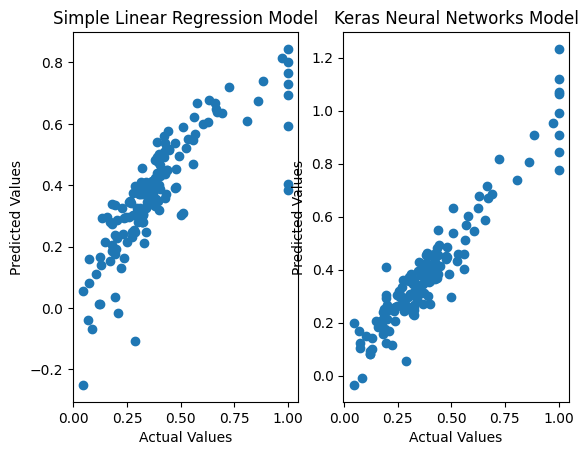

In [64]:
from sklearn.linear_model import LinearRegression

# call the object for linear Regression
lin = LinearRegression()

# fit and train the liinear regression model
lin.fit(X_train, Y_train)

# train the data for linear model
Y_pred_test_LM = lin.predict(X_test)

print(Y_pred_test_LM)


# Compare the Actual Output and the Predicted Output between the Linear Regression and ANN model
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_pred_test_LM)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Simple Linear Regression Model')


plt.subplot(122)
plt.scatter(Y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Keras Neural Networks Model')

In [65]:
# Calculate the mean square errorfrom Simple Linear Regression Model Technique
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred_test_LM)
print("Mean Squared Error Value is:", mse)

Mean Squared Error Value is: 0.015159030964982022


In [66]:
# From the above observation, the Mean Squared Error Value using Linear is 0.015 where as in Keras it's 0.04, as the error is less in Keras than in Linear, it is concluded that Regression using Keras Neural Network is much more efficient than using Simple Linear Regression.